### Resources:
* [D-separation steps](http://web.mit.edu/jmn/www/6.034/d-separation.pdf)
* [bnlearn datasets](https://www.bnlearn.com/bnrepository/)
* [Daggity paper](https://academic.oup.com/ije/article/45/6/1887/2907796)
* [Milestone](https://gitlab.pnnl.gov/y0-scuc/y0-archive/-/milestones/4)
* [pgmpy](https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Discrete%20Bayesian%20Network.ipynb)  -- get_independencies

### TODO:
* Break into module, write proper unit tests
* What about conditional independencies?  Currently only covers independencies.  
   * Can I just enumerate tripples and check 'A,B given=["C"]'?  
   * Would then check combinations-pairs + combinations-givens 
   * Up to how many givens do you check?

In [1]:
from y0.algorithm import falsification
import y0.examples
from y0.dsl import Variable
import copy
import networkx as nx
import pandas as pd

import seaborn as sns
from itertools import chain
from tqdm import tqdm

%matplotlib inline

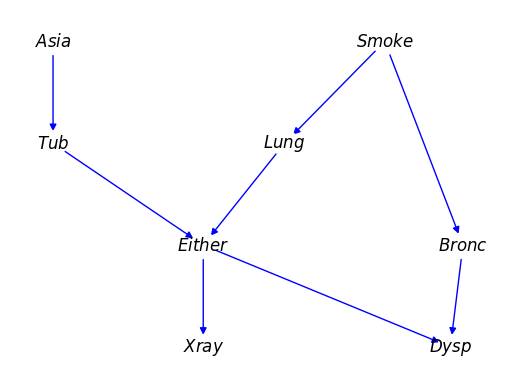

In [2]:
asia_G = y0.examples.asia_example.graph
asia_df = y0.examples.asia_example.data

asia_G.draw()

In [3]:
asia_df

,Unnamed: 0,Asia,Smoke,Tub,Lung,Bronc,Either,Xray,Dysp
0,1,-1,1,-1,-1,1,-1,-1,1
1,2,-1,1,-1,-1,-1,-1,-1,-1
2,3,-1,-1,1,-1,-1,1,1,1
3,4,-1,-1,-1,-1,1,-1,-1,1
4,5,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...
4995,4996,-1,-1,-1,-1,1,-1,1,1
4996,4997,-1,-1,-1,-1,-1,-1,-1,-1
4997,4998,-1,-1,-1,-1,-1,-1,-1,-1
4998,4999,-1,1,-1,-1,-1,-1,-1,1


In [4]:
issues = falsification.get_graph_falsifications(asia_G, asia_df, max_given=2, verbose=True)

d-separation check: 28it [00:00, 342.32it/s]
Checking conditionals:   0%|                                                                                              | 0/17 [00:00<?, ?it/s]/Users/cthoyt/dev/y0/src/y0/util/stat_utils.py:623: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/cthoyt/dev/y0/src/y0/util/stat_utils.py:623: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/cthoyt/dev/y0/src/y0/util/stat_utils.py:623: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list

In [5]:
issues.evidence

,left,right,given,chi^2,p,dof,Holm–Bonferroni level,flagged
8,Lung,Xray,Either,0.000000,1,1.000000,0.005000,False
13,Either,Smoke,Lung,0.000000,1,1.000000,0.010000,False
12,Tub,Xray,Either,0.000000,1,1.000000,0.008333,False
5,Smoke,Tub,,0.000000,1,1.000000,0.003846,False
15,Asia,Xray,Either,0.000000,2,1.000000,0.016667,False
4,Bronc,Xray,Either,0.206653,2,0.901833,0.003571,False
6,Smoke,Xray,Either,0.332301,2,0.846919,0.004167,False
10,Dysp,Xray,Either,0.617808,2,0.734251,0.006250,False
9,Lung,Tub,,0.129525,1,0.718925,0.005556,False
3,Asia,Lung,,0.201322,1,0.653656,0.003333,False


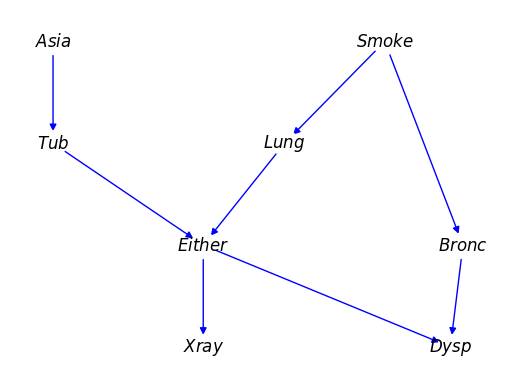

In [6]:
# Should be issues (Lung, Either) AT LEAST.
# .  Seeing issues (Lung, Xray) as well.  Is that all?
# TODO: Check d-separations by hand...
asia_G2 = copy.deepcopy(asia_G)
asia_G2.draw()

In [7]:
asia_G2.directed.remove_edge(
    Variable("Lung"), Variable("Either")
)  # delete_diedge("Lung", "Either")
issues = falsification.get_graph_falsifications(asia_G2, asia_df)
issues.failures

/Users/cthoyt/dev/y0/src/y0/util/stat_utils.py:623: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/cthoyt/dev/y0/src/y0/util/stat_utils.py:623: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/cthoyt/dev/y0/src/y0/util/stat_utils.py:623: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for z_state, df in data.groupby(Z):
/Users/cthoyt/dev/y0/src/y0/util/stat_utils.py:623: FutureWarning: In a f

Series([], dtype: float64)

In [8]:
issues.evidence

,left,right,given,chi^2,p,dof,Holm–Bonferroni level,flagged
16,Smoke,Tub,,0.000000,1,1.000000e+00,0.008333,False
11,Tub,Xray,Either,0.000000,1,1.000000e+00,0.004545,False
9,Dysp,Tub,Either,0.000000,1,1.000000e+00,0.003846,False
7,Asia,Xray,Either,0.000000,2,1.000000e+00,0.003333,False
4,Dysp,Xray,Either,0.617808,2,7.342514e-01,0.002778,False
8,Lung,Tub,,0.129525,1,7.189249e-01,0.003571,False
14,Asia,Lung,,0.201322,1,6.536561e-01,0.006250,False
5,Asia,Either,Tub,0.300140,1,5.837949e-01,0.002941,False
12,Asia,Dysp,Either,1.243757,2,5.369350e-01,0.005000,False
0,Bronc,Lung,Smoke,3.477138,2,1.757718e-01,0.002273,False


In [9]:
issues

Falsifications(failures=Series([], dtype: float64), evidence=      left   right   given        chi^2  p           dof  \
16   Smoke     Tub             0.000000  1  1.000000e+00   
11     Tub    Xray  Either     0.000000  1  1.000000e+00   
9     Dysp     Tub  Either     0.000000  1  1.000000e+00   
7     Asia    Xray  Either     0.000000  2  1.000000e+00   
4     Dysp    Xray  Either     0.617808  2  7.342514e-01   
8     Lung     Tub             0.129525  1  7.189249e-01   
14    Asia    Lung             0.201322  1  6.536561e-01   
5     Asia  Either     Tub     0.300140  1  5.837949e-01   
12    Asia    Dysp  Either     1.243757  2  5.369350e-01   
0    Bronc    Lung   Smoke     3.477138  2  1.757718e-01   
17    Asia   Smoke             1.841060  1  1.748268e-01   
1    Bronc     Tub             2.364399  1  1.241317e-01   
13    Asia   Bronc             2.495844  1  1.141472e-01   
20   Bronc    Xray            14.983980  1  1.084278e-04   
2     Dysp   Smoke   Bronc    21.128858